In [188]:
#the model should GENERALIZE well; It should function good on test data as well other than the training data
#Hyperparameters are used to control the behaviour and capacity of the model. Different kind of models use different kinds of 
    #hyperparameters.
#Validation dataset helps to finetune the hyperparameters of the classifier. Helps to find just enough hyperparameters for the model.
#Obviously this(validation data) is not done on training data as we dont want to define the exact number of hyperparameters during the training process of the model.
#How val data finetunes hyperparameters:
#we l apply the model on the validation dataset and whatever the hyperparameter value that gives the less generalization error is gng to be our hyperparameter.
#Test data has 0 effect on the model. Its just used for our final evaluation of our model.
#this can be done better with cnn


In [189]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical #for multiclass datasets gives one hot encoded form
import random


In [190]:
np.random.seed(0) #to get the same numbers as called


In [191]:
#declare tuples for data(train, test, val)
(X_train, y_train), (X_test, y_test) = mnist.load_data() #60k images for training, 10k fr testing

In [192]:
print(X_train.shape)
print(X_test.shape) #(images, pixels, pixels)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [193]:
#verifying the data import
assert(X_train.shape[0] == y_train.shape[0]), "The no of images is not equal to the no of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The no of images is not equal to the no of labels."
assert(X_train.shape[1:] == (28, 28)), "The dimensions of the image are not 28*28."
assert(X_test.shape[1:] == (28, 28)), "The dimensions of images are not 28*28."

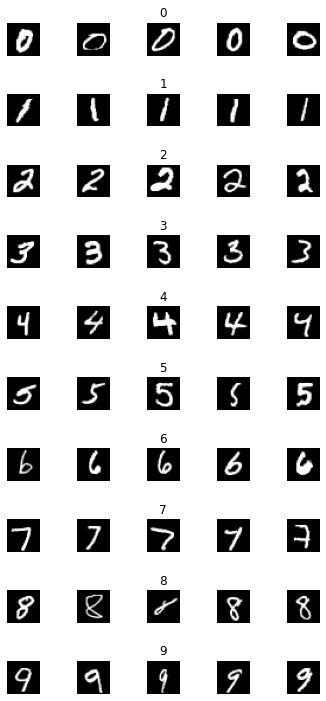

In [194]:
#visualization
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), : :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

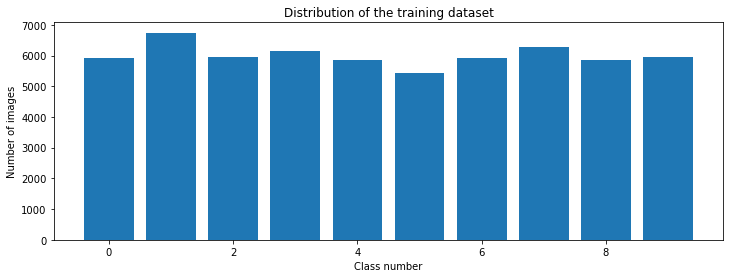

In [195]:
print(num_of_samples)
plt.figure(figsize =(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [196]:
#storing one hot encoded values
y_train =  to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [197]:
#normalization
X_train = X_train/255
X_test = X_test / 255
#div by 255 to get the range btw 0&1
#remember max pixel value = 255; min = 0

In [198]:
#flattening our images from 28*28 to 1*784 pixels
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [199]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [200]:
model = create_model()
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                7850      
                                                                 
 dense_34 (Dense)            (None, 30)                330       
                                                                 
 dense_35 (Dense)            (None, 10)                310       
                                                                 
 dense_36 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [201]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose = 1, shuffle=1  ) #verbose=progressbar

Epoch 1/10
270/270 [==============================] - 1s 1ms/step - loss: 0.6126 - accuracy: 0.8094 - val_loss: 0.3286 - val_accuracy: 0.9035
Epoch 2/10
270/270 [==============================] - 0s 914us/step - loss: 0.3435 - accuracy: 0.9016 - val_loss: 0.2290 - val_accuracy: 0.9327
Epoch 3/10
270/270 [==============================] - 0s 917us/step - loss: 0.2771 - accuracy: 0.9185 - val_loss: 0.2124 - val_accuracy: 0.9377
Epoch 4/10
270/270 [==============================] - 0s 914us/step - loss: 0.2535 - accuracy: 0.9252 - val_loss: 0.2066 - val_accuracy: 0.9413
Epoch 5/10
270/270 [==============================] - 0s 917us/step - loss: 0.2346 - accuracy: 0.9313 - val_loss: 0.1860 - val_accuracy: 0.9488
Epoch 6/10
270/270 [==============================] - 0s 910us/step - loss: 0.2314 - accuracy: 0.9311 - val_loss: 0.2021 - val_accuracy: 0.9443
Epoch 7/10
270/270 [==============================] - 0s 913us/step - loss: 0.2172 - accuracy: 0.9351 - val_loss: 0.1904 - val_accuracy: 0

Text(0.5, 0, 'epoch')

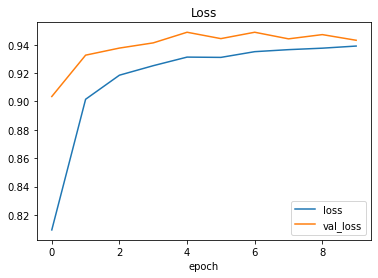

In [202]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [203]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.24329860508441925
Test accuracy: 0.9296000003814697


<Response [200]>


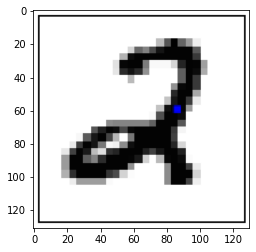

In [204]:
#Testing
import requests
from PIL import Image

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 170
  254 155 100  17   0   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0  18  89 176 155 198 239 252
  252 252 252 174   0   0   0   0   0 209]
 [  0   0   0   0   0   0   0   0   0   0  27 234 251 252 142  28  28  28
   62 222 252 246  87   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0  28 228 243 229 119   2   2   2
   18 185 252 247  88   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0   0  69   0   0   

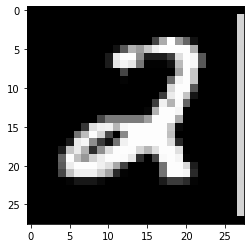

In [205]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))
print(image)


In [206]:
#normalize image again
image = image/255
image=image.reshape(1, 784)


In [207]:
prediction = model.predict(image)
classes=np.argmax(prediction,axis=1)
print("predicted digit:", str(classes))

predicted digit: [2]
